# ForSys Title
### Generate an inference in a single microscopy frame

In [1]:
import sys
sys.path.append('..')
import forsys as fs
import os
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = os.path.join("data", "in_vivo")
RESULTS_FOLDER = os.path.join("results")

# This is only necessary if you wish to create outputs
# if not os.path.exists(RESULTS_FOLDER):
#     os.makedirs(RESULTS_FOLDER)

#### Create the lattice from the desired time

In [3]:
tif_file = os.path.join(DATA_FOLDER, f"t_{1}.tif")

skeleton = fs.skeleton.Skeleton(tif_file, mirror_y=True)
vertices, edges, cells = skeleton.create_lattice()

vertices, edges, cells, _ = fs.virtual_edges.generate_mesh(vertices, edges, cells, ne=5)

#### Assign the frame object, and create the ForSys main object

In [4]:
frames = {}
frames[0] = fs.frames.Frame(0,
                            vertices,
                            edges,
                            cells)
forsys = fs.ForSys(frames)

#### Build and solve the system of equations for the force

In [5]:
forsys.build_force_matrix(when=0)
forsys.solve_stress(when=0, allow_negatives=False)

#### Build and solve the system of equations for the pressure

In [6]:
forsys.build_pressure_matrix(when=0)
forsys.solve_pressure(when=0, method="lagrange_pressure")

#### Create system's plots

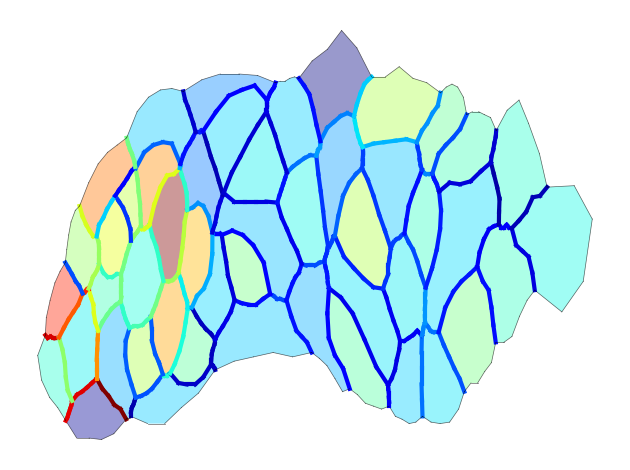

In [10]:
fig, ax = fs.plot.plot_inference(forsys.frames[0],
                                 normalized="max",
                                 mirror_y=False,
                                 colorbar=False,
                                 pressure=True)